In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from detector.easyocr import Reader
from glob import glob
import torch
import cv2

ckp = torch.load('./craft/exp/custom_data_train/CRAFT_clr_amp_5200.pth')['craft']

detector = Reader(['ko'], recognizer = False, gpu = False,
             model_storage_directory='./detector_ckp',
            user_network_directory='./detector_ckp',
            recog_network='custom')

Using CPU. Note: This module is much faster with a GPU.


In [2]:
imgs = glob('./data/2_txt_format/ch4_test_images/*')
image = cv2.imread(imgs[4])
result = detector.detect(image)

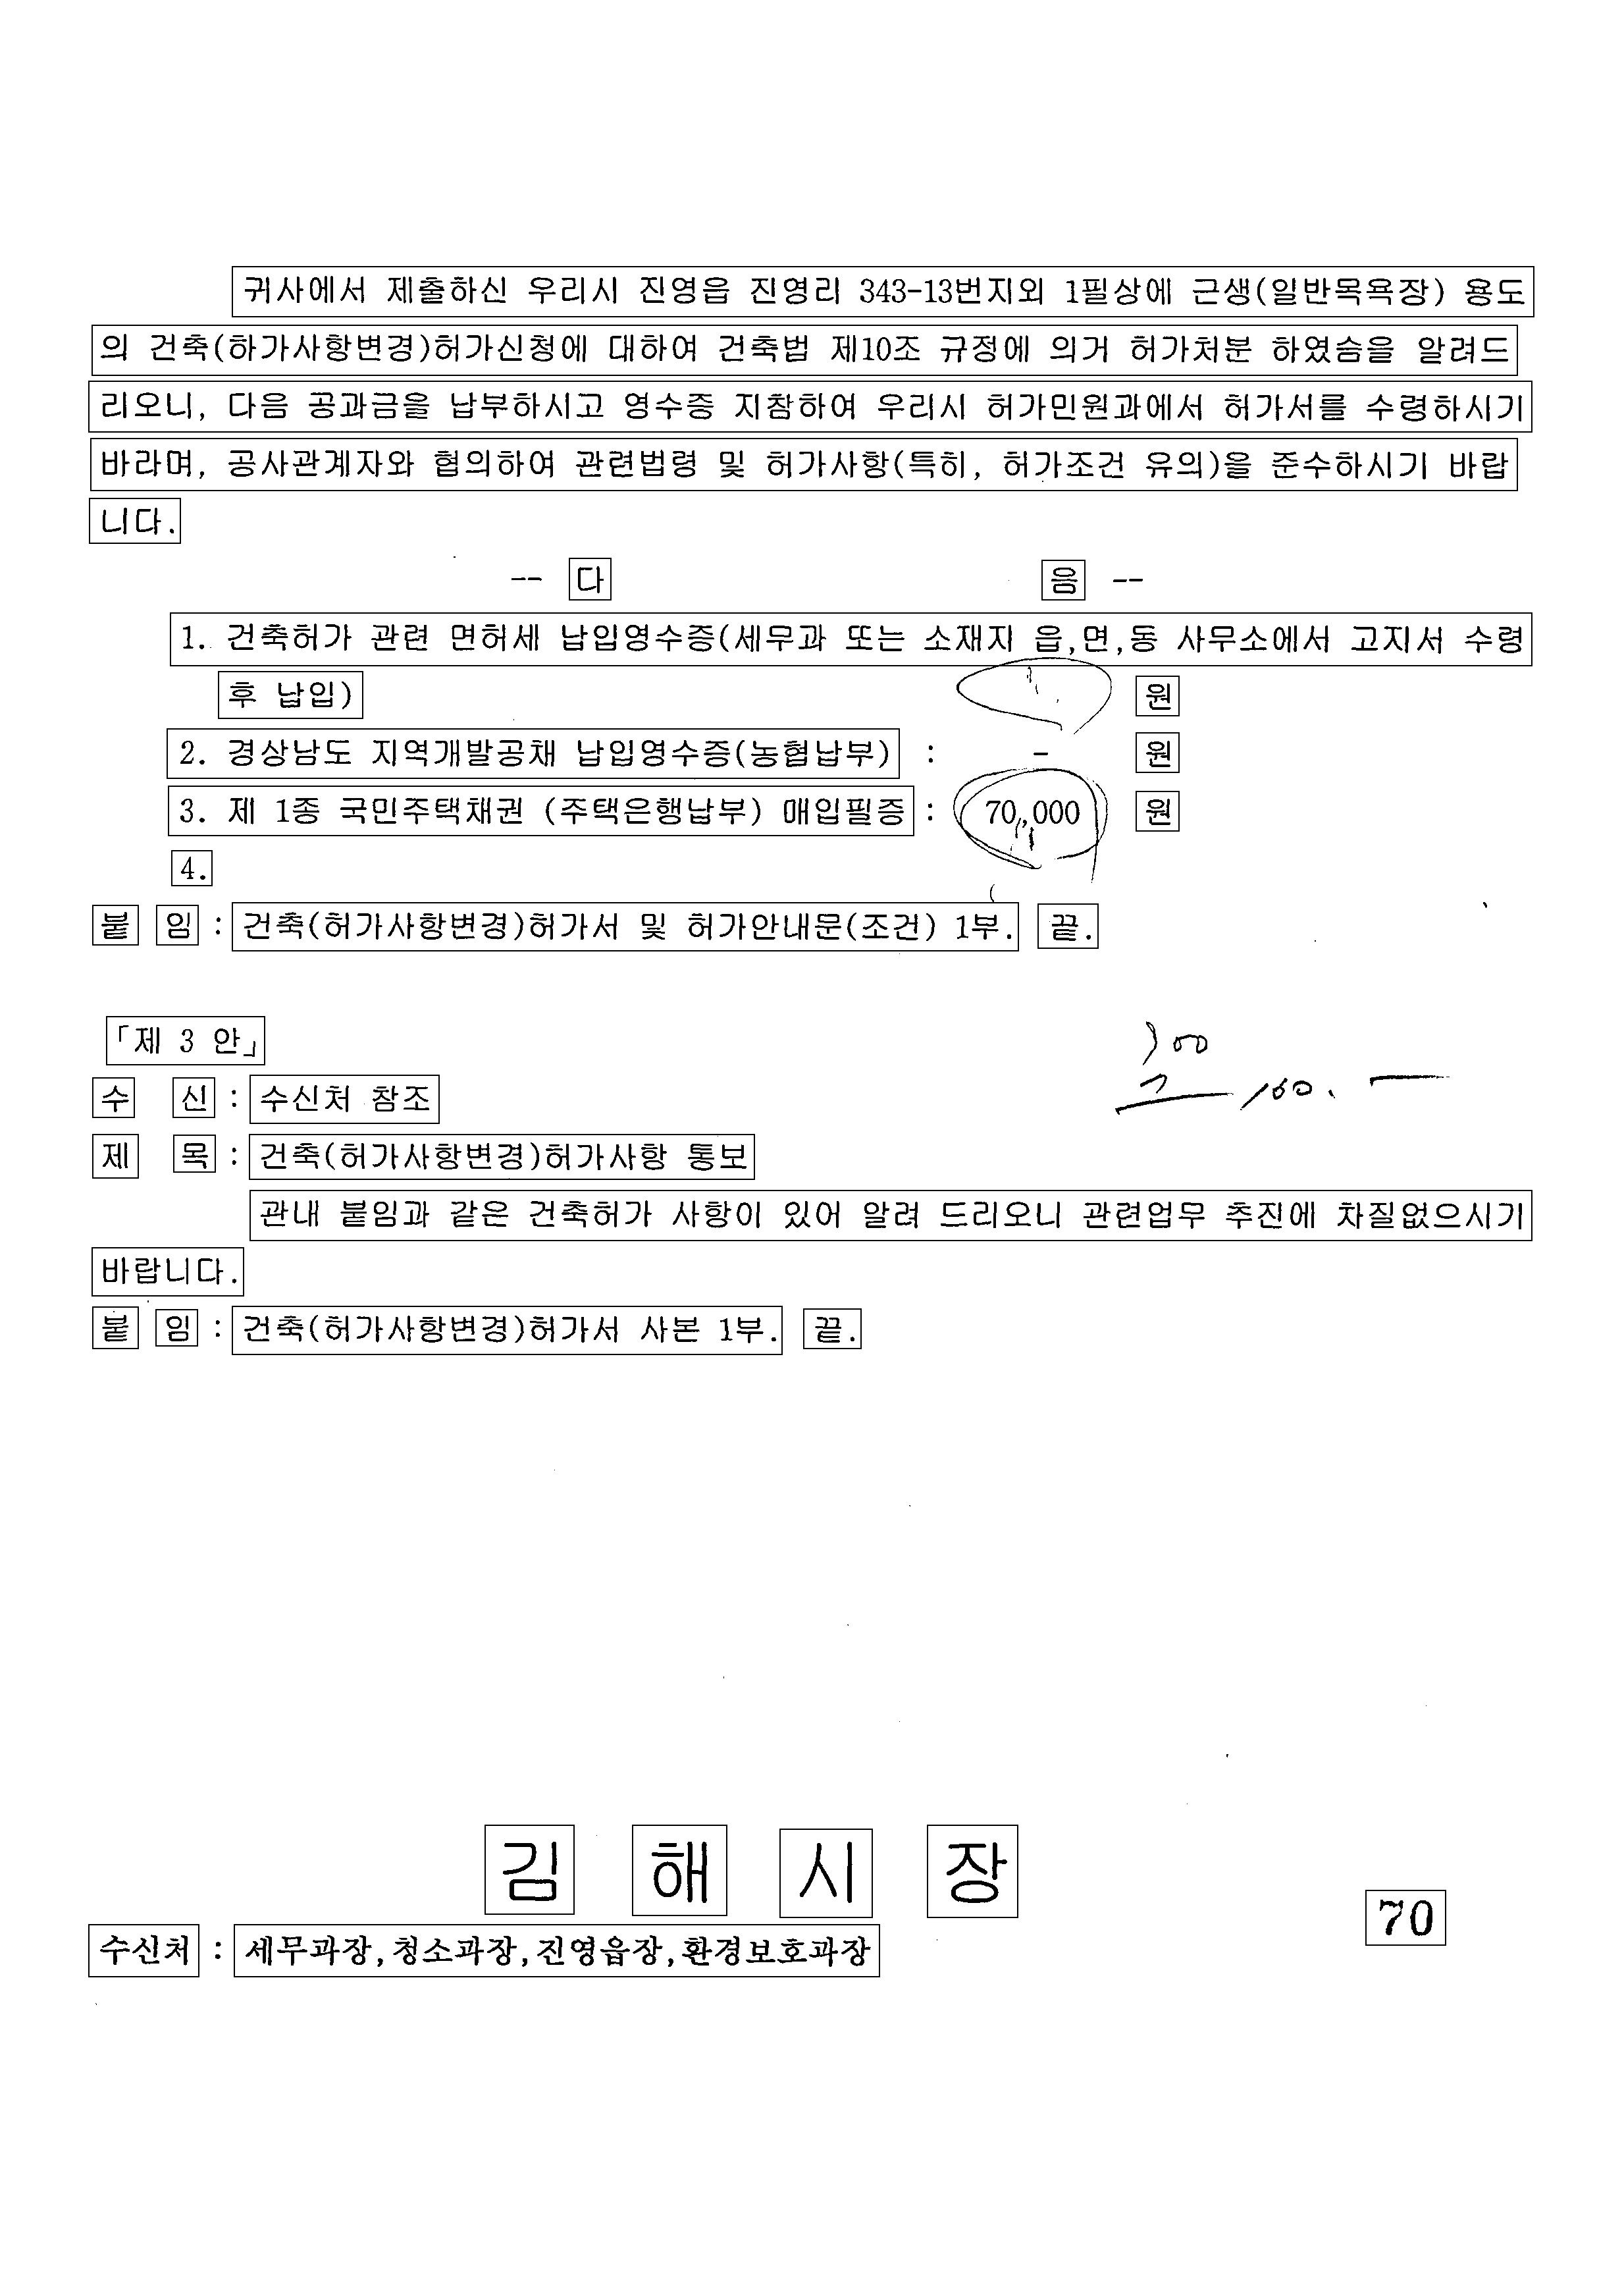

In [4]:
from PIL import Image, ImageDraw, ImageFont

image_bbox = Image.fromarray(image)
draw = ImageDraw.Draw(image_bbox)

color = [0]
for i in result[0][0]:
    draw.rectangle(((i[0], i[2]), (i[1], i[3])), outline=tuple(color), width=2)
#     break
image_bbox